# Fourier transforms

A Fourier transform (FT) is a mathematical transform that decomposes functions depending on space or time into functions depending on spatial frequency or temporal frequency. 


$\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x)\ e^{-i 2\pi \xi x}\,dx,\quad \forall\ \xi \in \mathbb R.$


### Inverse Fourier transform:

$f(x) = \int_{-\infty}^{\infty} \hat f(\xi)\ e^{i 2 \pi \xi x}\,d\xi,\quad \forall\ x \in \mathbb R$

# Discrete Fourier transforms (DFT):

Sometime we don't have analytical functions, but discrete data and we may be interested in characterising the spectral information of such data.

The discrete-time Fourier transform of a discrete sequence of real or complex numbers $x[n]$, for all integers $n$, is a Fourier series, which produces a periodic function of a frequency variable. When the frequency variable, $\omega$, has normalized units of radians/sample, the periodicity is $2\pi$, and the Fourier series is:

To do this, we can carry out a Discrete Fourier Transform (DFT), defined as:

$\chi(k) =\sum_{n=0}^{N-1}x(n)\,e^{\frac{-i\,2\pi\,k\,n}{N}}$

where $k=0, ..., N-1$, where

$N$ = number of samples

$n$ = current sample

$k$ = current frequency, where $𝑘\in[0,N−1]$

$x_n$ = the sine value at sample $n$.

$\chi_k$ = The DFT which includes information of both amplitude and phase.

$\chi_k$ is a complex number that encodes both the amplitude and phase information of a complex sinusoidal component $e^{i\cdot 2\pi kn/N}$ of function $x(n)$.


The amplitude and phase of the signal can be calculated as:

$$A = \frac{|X_k|}{N}= \frac{\sqrt{Re(X_k)^2 + Im(X_k)^2}}{N}$$


$$\phi = atan2(Im(X_k), Re(X_k))$$


where $Im(X_k)$ and $Re(X_k)$ are the imagery and real part of the complex number, $atan2$ is the two-argument form of the $arctan$ function. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\chi(k) =\sum_{n=0}^{N-1}x(n)\,e^{\frac{-i\,2\pi\,k\,n}{N}}$

In [2]:
def DFT_function(signal):
    
    N = len(signal)
    n = np.arange(0, N)
    k = n.reshape((N, 1))
    
    exp_term = np.exp(-2j*np.pi*k*n/N)
    
    chi = np.dot(exp_term, signal)
    
    return chi

### Example 1:

Find the DFT of x = (0, 1, 2, 3)

In [3]:
signal_1 = np.arange(0, 4, 1)
print(signal_1)

[0 1 2 3]


In [4]:
fourier_1 = DFT_function(signal_1)

print(fourier_1)

[ 6.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]


## DFT using numpy.fft():

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

In [5]:
fourier_2 = np.fft.fft(signal_1)

print(fourier_2)


#frequencies:
freqs_2 = np.fft.fftfreq(signal_1.size, d=1) # d = 1 in this case, so it is ommitted

print(freqs_2)

[ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]
[ 0.    0.25 -0.5  -0.25]


## DFT using scipy.fft():

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [6]:
from scipy import fft

In [7]:
fourier_3 = fft.fft(signal_1)

print(fourier_3)

#frequencies:
freqs_3 = fft.fftfreq(signal_1.size)

print(freqs_3)

[ 6.-0.j -2.+2.j -2.-0.j -2.-2.j]
[ 0.    0.25 -0.5  -0.25]


## Inverse DFT

$x(n)= \frac{1}{N}\sum^{N-1}_{k=0}X_k\,e^{i\,2\pi\,k\,n/N}$



In [8]:
def invDFT_function(any_fourier):
    
    N = len(any_fourier)
    
    n = np.arange(0, N)
    
    k = n.reshape((N, 1))
    
    exp_term = np.exp(2j * np.pi * k * n / N)
    
    x_n = np.dot(exp_term, any_fourier)
    
    return x_n/N

### For our first example:

In [9]:
x_n1 = invDFT_function(fourier_1)

print("x_n =", np.abs(x_n1))

x_n = [5.1191594e-16 1.0000000e+00 2.0000000e+00 3.0000000e+00]


### Example 2:

Calculate the DFT of the following series using our own function:

$y(t)=\sum_i^n i\,\cos(i\alpha\,t)$, with $\alpha = 20\pi$

We already know the answer since we computed this using np.fft here:

https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-4/401-Fourier-Analysis.ipynb

In [10]:
def function_series(t, a, n):
    # t - time axis
    # a = 20*pi
    # n is a free parameter, from 0 to n
    
    nu = []
    f = np.zeros(t.size)
    
    for i in range(n+1):
        
        y = i*np.cos(i*a*t)
        
        #Analytical frequencies
        nu.append(i*a/(2*np.pi))
        
        f += y
        
    nu = np.array(nu)    
    return f, nu

### Axes:

In [11]:
# sampling rate
s_rate = 10000

# sampling interval
t_s = 1.0/s_rate

# x-axis
t = np.arange(0,np.pi,t_s)

print(t.size)

# Frequencies and n=5

n = 5
w = 20*np.pi

yy, nu = function_series(t, w, n)

31416


### Frequencies:

In [12]:
print("frequencies in Hz:", nu)

frequencies in Hz: [ 0. 10. 20. 30. 40. 50.]


### Signal plot:

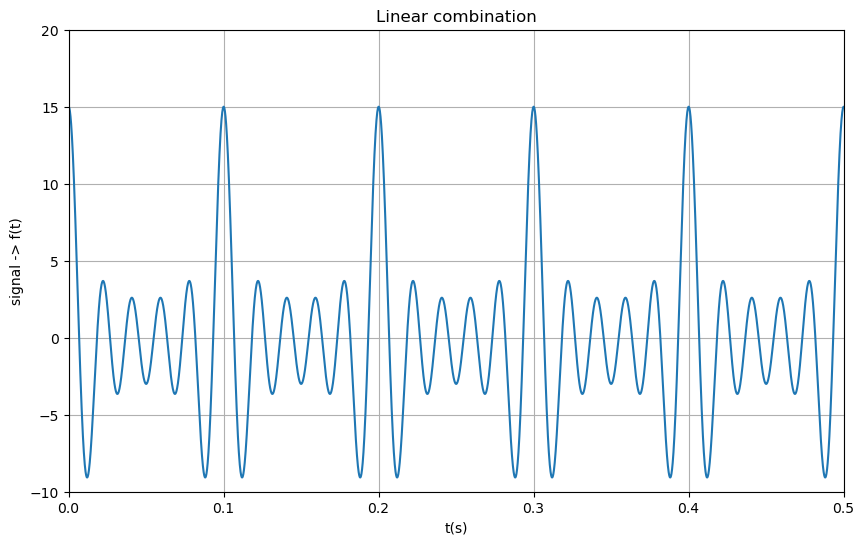

In [13]:
#plotting
axes_range = [0, 0.5, -10, 20]
plt.figure(figsize = (10, 6))

plt.plot(t, yy)

plt.title('Linear combination')

plt.xlabel('t(s)')
plt.ylabel('signal -> f(t)')
plt.axis(axes_range)
plt.grid()
plt.show()

### Fourier transform:

In [24]:
#Fourier transform using our own function

X_fourier = DFT_function(yy)

In [15]:
print(X_fourier)

[47.25254762 +0.j         47.31113547+14.44892875j
 47.48780385+28.95939594j ... 47.78529699-43.59413336j
 47.48780385-28.95939594j 47.31113547-14.44892875j]


### Frequencies:

In [16]:
N = len(X_fourier)
print(N)

n = np.arange(N)
print(n)

T = N/s_rate
print(T)

freq = n/T

31416
[    0     1     2 ... 31413 31414 31415]
3.1416


### Fourier plot:

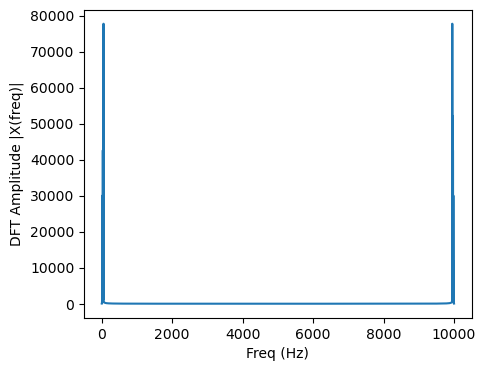

In [20]:
plt.figure(figsize=(5,4))

plt.plot(freq, abs(X_fourier))

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

### Characteristic frequencies:

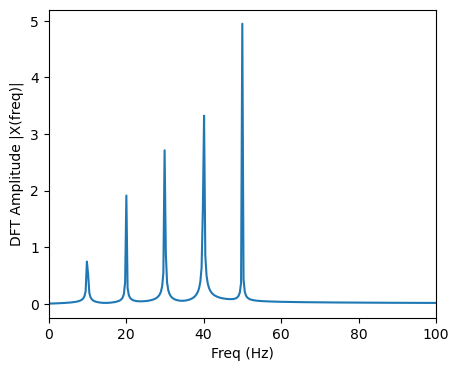

In [22]:
plt.figure(figsize=(5,4))

plt.plot(freq[:N//2], (abs(X_fourier)[:N//2])/(N//2))

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.xlim(0,100)
plt.show()

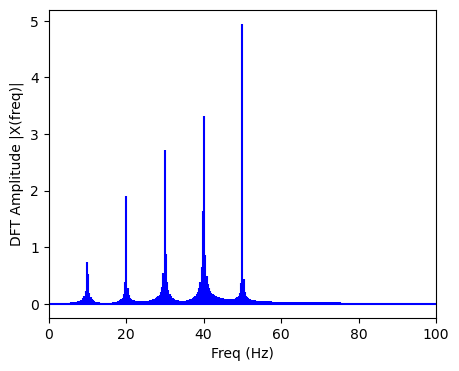

In [23]:
plt.figure(figsize=(5,4))

plt.stem(freq[:N//2], (abs(X_fourier)[:N//2])/(N//2), "b", markerfmt=" ", basefmt="-b")

plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.xlim(0,100)
plt.show()